In [ ]:
!pip install scikeras

In [ ]:
!pip install imbalanced-learn

In [ ]:
# @title
import pandas as pd
import numpy
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler

# --- 1. 데이터 로딩 (새 파일) ---
filename = 'givemesomecreidt.csv'
# 💡 [수정] index_col=0 제거, on_bad_lines='skip' 추가
data = pd.read_csv(filename, on_bad_lines='skip')

# --- 2. 결측치 처리 (Lab 2) ---
# 💡 [수정] 이 단계는 새 CSV 파일(givemesomecreidt.csv)에
# 이미 결측치가 없으므로 *생략*합니다.
print("--- (결측치 처리 단계 생략: 새 데이터는 결측치가 없습니다) ---")

# --- 3. X (피처 8개), Y (타겟 1개) 분리 (Lab 3) ---
Y = data['SeriousDlqin2yrs'].values
# 💡 [수정] 10개 피처 -> 8개 피처
X_df = data.drop('SeriousDlqin2yrs', axis=1)
X = X_df.values
feature_names = X_df.columns.tolist()

# --- 4. 데이터 스케일링 (Lab 2) ---
# (MLP와 LR의 공정한 비교를 위해 표준화된 X를 사용)
# (8개 피처로 표준화 수행)
scaler = StandardScaler().fit(X)
standardizedX = scaler.transform(X)

print("--- 0. 준비 완료: X, Y, standardizedX 변수 생성됨 ---")
# 💡 [수정] 10 -> 8
print(f"X shape (피처): {standardizedX.shape}, Y shape (타겟): {Y.shape}")
print(f"8개 피처 목록: {feature_names}")

--- (결측치 처리 단계 생략: 새 데이터는 결측치가 없습니다) ---
--- 0. 준비 완료: X, Y, standardizedX 변수 생성됨 ---
X shape (피처): (150000, 8), Y shape (타겟): (150000,)
8개 피처 목록: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans']


In [ ]:
import pandas as pd
import numpy
from numpy import set_printoptions

# --- Lab 2: 데이터 전처리 (표준화) ---
from sklearn.preprocessing import StandardScaler

# --- Lab 3: 특성 선택 (Feature Importance) ---
from sklearn.ensemble import ExtraTreesClassifier     #
from sklearn.feature_selection import SelectFromModel

# --- 1. 데이터 로딩 (새 파일) ---
filename = 'givemesomecreidt.csv'
# 💡 78281번 줄의 오류를 '무시(skip)'하는 옵션 추가
data = pd.read_csv(filename, on_bad_lines='skip')

# --- 2. 💡 [수정] 이상치 처리(Capping) '삭제' ---
# (98 같은 특수 코드가 없으므로, 모든 이상치는 StandardScaler가 자동 처리)
print("--- [1단계] (1/3) 이상치 수동 처리(Capping) 생략 ---")

# --- 3. 💡 [수정] 결측치 처리(fillna) 생략 ---
# (새 데이터는 결측치가 없으므로 생략)
print("--- [1단계] (2/3) 결측치 처리 생략 (필요 없음) ---")

# --- 4. X (피처 8개), Y (타겟 1개) 분리 ---
Y = data['SeriousDlqin2yrs'].values
X_df = data.drop('SeriousDlqin2yrs', axis=1)
X = X_df.values
feature_names = X_df.columns.tolist() # 8개 피처 이름

# --- 5. 데이터 스케일링 (Lab 2) ---
# (8개 피처 전체를 표준화)
# (DebtRatio(300k) 등 모든 이상치가 여기서 자동 처리됨)
scaler = StandardScaler().fit(X)
standardizedX = scaler.transform(X) # [150000, 8] 크기

print("--- [1단계] (3/3) 표준화 완료: standardizedX (8개 피처) 생성됨 ---")

# --- 6. 특성 선택 (Lab 3) ---
print("--- [1단계] (4/4) Feature Importance (ExtraTrees)로 특성 선택 시작 ---")

# 6-1. '심사관' 모델(ExtraTrees) 생성 (Lab 3)
clf = ExtraTreesClassifier(n_estimators=100, random_state=7)
clf.fit(standardizedX, Y) # 8개 피처로 중요도 학습

# 6-2. (PPT용) 8개 피처의 중요도 점수 확인
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})
print("\n--- 8개 피처 전체 중요도 점수 (Lab 3) ---")
print(importance_df.sort_values(by='Importance', ascending=False))

# 6-3. '선택기' 생성: 💡 k=6 (상위 6개)
# (Dependents, CreditLoans 제거)
selector = SelectFromModel(clf, max_features=6, threshold=-numpy.inf, prefit=True)

# 6-4. '선택기'로 8개 피처를 6개로 변환
X_selected = selector.transform(standardizedX)

# 6-5. (PPT용) 어떤 6개가 선택됐는지 확인
mask = selector.get_support()
selected_features = [f for f, m in zip(feature_names, mask) if m]
# --- 7. (PPT 증거자료) 표준화(Scaling) 결과 검증 ---

# 1. (X_selected가 아닌) 8개 피처 전체가 표준화된
# 'standardizedX' 데이터를 DataFrame으로 다시 만듭니다.
# (이래야 .describe()를 보기 편합니다)
standardized_df = pd.DataFrame(standardizedX, columns=feature_names)

# 2. 요약 통계 실행
print("\n--- [PPT 증거] 8개 피처 표준화(StandardScaler) 결과 ---")
print("(mean이 0에, std가 1에 가까운지 확인)")
print(standardized_df.describe())
print("\n--- 특성 선택 완료 ---")
print(f"새로운 피처 shape: {X_selected.shape}") # (150000, 6)
print(f"선택된 6개 피처: {selected_features}")
print("--- [1단계] 최종 완료: X_selected (6개 피처), Y 변수 준비됨 ---")

--- [1단계] (1/3) 이상치 수동 처리(Capping) 생략 ---
--- [1단계] (2/3) 결측치 처리 생략 (필요 없음) ---
--- [1단계] (3/3) 표준화 완료: standardizedX (8개 피처) 생성됨 ---
--- [1단계] (4/4) Feature Importance (ExtraTrees)로 특성 선택 시작 ---

--- 8개 피처 전체 중요도 점수 (Lab 3) ---
                                Feature  Importance
3                             DebtRatio    0.254983
0  RevolvingUtilizationOfUnsecuredLines    0.250076
4                         MonthlyIncome    0.202431
1                                   age    0.124203
6                     CombinedDefaulted    0.092535
2  NumberOfTime30-59DaysPastDueNotWorse    0.045401
5                    NumberOfDependents    0.024072
7                   CombinedCreditLoans    0.006299

--- [PPT 증거] 8개 피처 표준화(StandardScaler) 결과 ---
(mean이 0에, std가 1에 가까운지 확인)
       RevolvingUtilizationOfUnsecuredLines           age  \
count                          1.500000e+05  1.500000e+05   
mean                          -5.494864e-18  1.827516e-16   
std                            1.000003e+00  


--- [2단계] 알고리즘 5-Fold CV (AUC + Report) 비교 (6개 피처) ---
(MLP 포함으로 5~10분 정도 소요될 수 있습니다...)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo


     [ 최종 성능 비교 결과 요약 ]

--- 1. 5-Fold CV 평균 AUC 점수 ---
LR: 0.803 (Std: 0.002)
RF: 0.820 (Std: 0.003)
MLP: 0.846 (Std: 0.003)

--- 2. 통합 Classification Reports ---

--- LR Classification Report ---
              precision    recall  f1-score   support

           0       0.93      1.00      0.97    139974
           1       0.52      0.01      0.02     10026

    accuracy                           0.93    150000
   macro avg       0.72      0.51      0.49    150000
weighted avg       0.91      0.93      0.90    150000


--- RF Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    139974
           1       0.45      0.13      0.20     10026

    accuracy                           0.93    150000
   macro avg       0.70      0.56      0.58    150000
weighted avg       0.91      0.93      0.91    150000


--- MLP Classification Report ---
              precision    recall  f1-score   support

           0       0.94

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51608 (\N{HANGUL SYLLABLE JEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

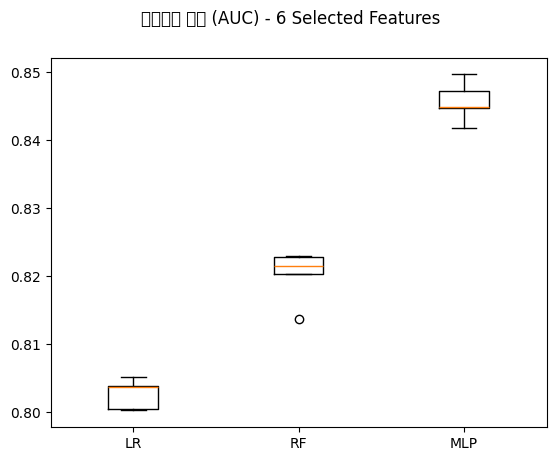

In [ ]:
from matplotlib import pyplot
import numpy
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, classification_report # (Lab 4)

# --- Scikit-learn 모델 임포트 (Lab 4) ---
from sklearn.linear_model import LogisticRegression  #
from sklearn.ensemble import RandomForestClassifier

# --- Keras(MLP) 모델 임포트 (Lab 6) ---
from keras.models import Sequential                #
from keras.layers import Dense                     #

# (0단계/1단계에서 X_selected (6개 피처)와 Y가 준비되었다고 가정)

# --- 1. MLP 모델 생성 함수 정의 (Lab 6) ---
def create_mlp_model():
    model = Sequential()
    # 💡 6개 피처 입력
    model.add(Dense(12, input_dim=6, activation='relu')) #
    model.add(Dense(8, activation='relu'))             #
    model.add(Dense(1, activation='sigmoid'))          #
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #
    return model

# --- 2. 비교할 알고리즘(모델) 목록 생성 (Lab 4) ---
models = []
# 💡 [수정] 래퍼 대신, 훈련되지 않은 '원본' 모델 객체를 추가
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('RF', RandomForestClassifier(random_state=7)))
models.append(('MLP', create_mlp_model)) # 💡 [수정] 함수 자체를 전달

# --- 3. 5-Fold CV로 각 모델의 AUC + Report 측정 (Lab 3+4+6) ---
results_auc = []       # AUC 점수 5개 (Boxplot용)
names = []             # 모델 이름 (Boxplot용)
final_reports = {}     # 모델별 최종 Report (마지막 출력용)
all_predictions = {}   # 모델별 (Y_true, Y_pred) 누적 (Report 계산용)

# 평가 방법: KFold (k=5) (Lab 3)
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

print("\n--- [2단계] 알고리즘 5-Fold CV (AUC + Report) 비교 (6개 피처) ---")
print("(MLP 포함으로 5~10분 정도 소요될 수 있습니다...)")

for name, model_obj in models:

    fold_auc_scores = []   # 현재 모델의 5개 Fold AUC 점수
    all_y_true = []        # 5개 Fold의 Y_test 누적
    all_y_pred = []        # 5개 Fold의 Y_pred 누적

    # Lab 6의 수동 k-Fold 루프
    for train, test in kfold.split(X_selected, Y):
        X_train, X_test = X_selected[train], X_selected[test]
        y_train, y_test = Y[train], Y[test]

        # 1. 모델 생성 및 훈련
        if name == 'MLP':
            model = create_mlp_model() #
            model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0) #
        else: # LR, RF
            model = model_obj # 원본 객체 복사 (매번 새 모델)
            model.fit(X_train, y_train)

        # 2. 확률(AUC용) 및 예측(Report용) 계산
        if name == 'MLP':
            # 💡 [수정] predict 시 verbose=0 추가 (로그 숨기기)
            y_prob = model.predict(X_test, verbose=0).ravel()
        else: # LR, RF
            y_prob = model.predict_proba(X_test)[:, 1] #

        y_pred = (y_prob > 0.5).astype(int) # 0.5 기준으로 0/1 결정

        # 3. 점수 및 예측값 누적
        fold_auc_scores.append(roc_auc_score(y_test, y_prob)) #
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

    # 4. 5-Fold가 끝난 모델의 최종 결과 저장
    results_auc.append(fold_auc_scores) # 5개 점수 리스트 추가
    names.append(name)
    # 5개 Fold의 모든 예측을 합쳐서 최종 Report 1개 생성 (Lab 4)
    final_reports[name] = classification_report(all_y_true, all_y_pred)

# --- 4. 💡 [수정] 모든 결과를 '한번에' 출력 ---
print("\n" + "="*50)
print("     [ 최종 성능 비교 결과 요약 ]")
print("="*50)

print("\n--- 1. 5-Fold CV 평균 AUC 점수 ---")
for name, auc_scores in zip(names, results_auc):
    print("%s: %.3f (Std: %.3f)" % (name, numpy.mean(auc_scores), numpy.std(auc_scores)))

print("\n--- 2. 통합 Classification Reports ---")
for name, report in final_reports.items():
    print(f"\n--- {name} Classification Report ---")
    print(report)

# --- 5. 박스 플롯(Boxplot)으로 시각화 비교 (Lab 4) ---
print("\n--- 3. Boxplot 시각화 (AUC 비교) ---")
fig = pyplot.figure()
fig.suptitle('알고리즘 비교 (AUC) - 6 Selected Features')
ax = fig.add_subplot(111)
pyplot.boxplot(results_auc) # 5개 점수의 분포를 상자로 그림
ax.set_xticklabels(names)
pyplot.show()


--- [2단계] SMOTE 적용 후 5-Fold CV 비교 (6개 피처) ---
(MLP 포함으로 5~10분 정도 소요될 수 있습니다...)

--- Fold 1/5 ---
SMOTE 적용 전 (Train): 0=111957, 1=8043
SMOTE 적용 후 (Train): 0=111957, 1=111957

--- Fold 2/5 ---
SMOTE 적용 전 (Train): 0=111984, 1=8016
SMOTE 적용 후 (Train): 0=111984, 1=111984

--- Fold 3/5 ---
SMOTE 적용 전 (Train): 0=111936, 1=8064
SMOTE 적용 후 (Train): 0=111936, 1=111936

--- Fold 4/5 ---
SMOTE 적용 전 (Train): 0=111949, 1=8051
SMOTE 적용 후 (Train): 0=111949, 1=111949

--- Fold 5/5 ---
SMOTE 적용 전 (Train): 0=112070, 1=7930
SMOTE 적용 후 (Train): 0=112070, 1=112070

     [ SMOTE 적용 후 최종 성능 비교 결과 ]

--- 1. 5-Fold CV 평균 AUC 점수 (Boxplot용) ---
LR: 0.802 (Std: 0.002)
RF: 0.799 (Std: 0.005)
MLP: 0.841 (Std: 0.003)

--- 2. 통합 Classification Reports (진단용) ---

--- LR Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.83      0.90    139974
           1       0.22      0.67      0.33     10026

    accuracy                           0.82    150000
   macr

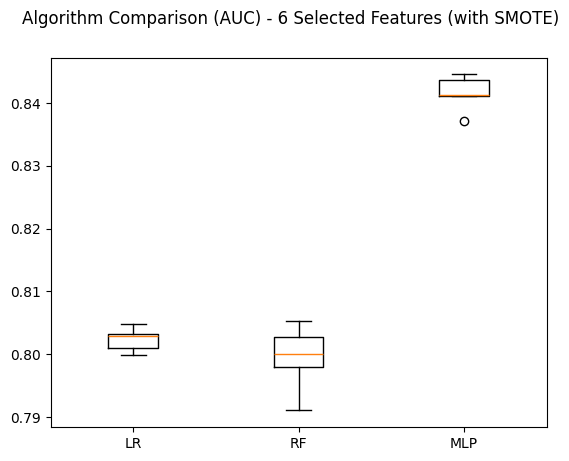

In [ ]:
# --- 2단계: SMOTE 적용 모델 비교 (6번 코드) ---
# (1단계에서 X_selected, Y 변수가 생성되었다고 가정)

# --- 2-1. 라이브러리 임포트 (2단계용) ---
from matplotlib import pyplot
import numpy
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.base import clone

# Keras 경고 메시지 숨기기 (선택 사항)
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.layers.core.dense')

# --- 2-2. MLP 모델 생성 함수 정의 (Lab 6) ---
# 💡 Keras 경고 메시지를 피하기 위해 Input 레이어 사용
def create_mlp_model():
    inputs = Input(shape=(6,)) # 6개 피처 입력
    hidden1 = Dense(8, activation='relu')(inputs)
    hidden2 = Dense(4, activation='relu')(hidden1)
    outputs = Dense(1, activation='sigmoid')(hidden2)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# --- 2-3. 비교할 알고리즘(모델) 목록 생성 (Lab 4) ---
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('RF', RandomForestClassifier(random_state=7)))
models.append(('MLP', create_mlp_model)) # 함수 자체를 전달

# 💡 [핵심 수정!]
# models 리스트에서 이름(LR, RF, MLP)만 추출하여 names 리스트를 미리 만듭니다.
names = [name for name, _ in models]

# --- 2-4. 5-Fold CV (SMOTE 적용) ---
results_auc = []
# names = []  <- 💡 [제거] 이 줄은 삭제합니다. (위에서 이미 생성)
final_reports = {}
all_predictions = {}

kfold = KFold(n_splits=5, random_state=7, shuffle=True) #

print("\n--- [2단계] SMOTE 적용 후 5-Fold CV 비교 (6개 피처) ---")
print("(MLP 포함으로 5~10분 정도 소요될 수 있습니다...)")

# 수동 K-Fold 루프
for i, (train, test) in enumerate(kfold.split(X_selected, Y)):
    print(f"\n--- Fold {i+1}/5 ---") # 현재 Fold 번호 출력
    X_train, X_test = X_selected[train], X_selected[test]
    y_train, y_test = Y[train], Y[test]

    # [SMOTE 지표] (1) 적용 전 개수 확인
    # (numpy가 1단계에서 이미 import 되었다고 가정)
    print(f"SMOTE 적용 전 (Train): 0={numpy.bincount(y_train)[0]}, 1={numpy.bincount(y_train)[1]}")

    # [SMOTE] 적용 (훈련 데이터에만!)
    smote = SMOTE(random_state=7) #
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # [SMOTE 지표] (2) 적용 후 개수 확인
    print(f"SMOTE 적용 후 (Train): 0={numpy.bincount(y_train_res)[0]}, 1={numpy.bincount(y_train_res)[1]}")


    for name, model_obj in models:
        # 1. 모델 생성 및 훈련
        if name == 'MLP':
            model = create_mlp_model() # 매번 새 MLP 모델 생성
            # 💡 [개선] epochs=15 (기존 50은 과적합 위험, 15로 줄임)
            model.fit(X_train_res, y_train_res, epochs=15, batch_size=10, verbose=0)
        else: # LR, RF
            # 💡 [개선] 매 Fold마다 새 모델 객체를 사용 (clone)
            model = clone(model_obj)
            model.fit(X_train_res, y_train_res)

        # 2. 확률(AUC용) 및 예측(Report용) 계산
        if name == 'MLP':
            y_prob = model.predict(X_test, verbose=0).ravel() # verbose=0
        else: # LR, RF
            y_prob = model.predict_proba(X_test)[:, 1] #

        y_pred = (y_prob > 0.5).astype(int)

        # 3. 점수 및 예측값 누적 (모델별로 저장)
        if name not in all_predictions:
            all_predictions[name] = {'y_true': [], 'y_pred': [], 'auc_scores': []}

        all_predictions[name]['auc_scores'].append(roc_auc_score(y_test, y_prob)) #
        all_predictions[name]['y_true'].extend(y_test)
        all_predictions[name]['y_pred'].extend(y_pred)

# --- 2-5. 💡 모든 결과를 '한번에' 출력 ---
print("\n" + "="*50)
print("     [ SMOTE 적용 후 최종 성능 비교 결과 ]")
print("="*50)

print("\n--- 1. 5-Fold CV 평균 AUC 점수 (Boxplot용) ---")
# 💡 'names' 리스트가 채워져 있으므로 이제 이 루프가 정상 작동합니다.
for name in names:
    auc_scores = all_predictions[name]['auc_scores']
    results_auc.append(auc_scores) # Boxplot용 데이터
    print("%s: %.3f (Std: %.3f)" % (name, numpy.mean(auc_scores), numpy.std(auc_scores)))

print("\n--- 2. 통합 Classification Reports (진단용) ---")
for name in names:
    report = classification_report(all_predictions[name]['y_true'], all_predictions[name]['y_pred']) #
    print(f"\n--- {name} Classification Report ---")
    print(report)

# --- 2-6. 박스 플롯(Boxplot)으로 시각화 비교 (Lab 4) ---
print("\n--- 3. Boxplot 시각화 (AUC 비교) ---")
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison (AUC) - 6 Selected Features (with SMOTE)')
ax = fig.add_subplot(111)
pyplot.boxplot(results_auc) # 5개 점수의 분포를 상자로 그림
ax.set_xticklabels(names)
pyplot.show() # 💡 Colab에서 차트 표시


--- [2단계] SMOTE 적용 후 5-Fold CV 비교 (6개 피처) ---
(MLP 포함으로 5~10분 정도 소요될 수 있습니다...)

--- Fold 1/5 ---
SMOTE 적용 전 (Train): 0=111957, 1=8043
SMOTE 적용 후 (Train): 0=111957, 1=111957

--- Fold 2/5 ---
SMOTE 적용 전 (Train): 0=111984, 1=8016
SMOTE 적용 후 (Train): 0=111984, 1=111984

--- Fold 3/5 ---
SMOTE 적용 전 (Train): 0=111936, 1=8064
SMOTE 적용 후 (Train): 0=111936, 1=111936

--- Fold 4/5 ---
SMOTE 적용 전 (Train): 0=111949, 1=8051
SMOTE 적용 후 (Train): 0=111949, 1=111949

--- Fold 5/5 ---
SMOTE 적용 전 (Train): 0=112070, 1=7930
SMOTE 적용 후 (Train): 0=112070, 1=112070

     [ SMOTE 적용 후 최종 성능 비교 결과 ]

--- 1. 5-Fold CV 평균 AUC 점수 (Boxplot용) ---
LR: 0.802 (Std: 0.002)
RF: 0.799 (Std: 0.005)
MLP: 0.844 (Std: 0.004)

--- 2. 통합 Classification Reports (진단용) ---

--- LR Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.83      0.90    139974
           1       0.22      0.67      0.33     10026

    accuracy                           0.82    150000
   macr

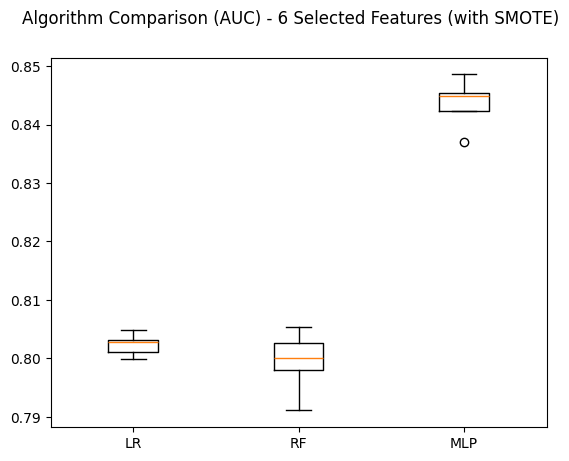

In [ ]:
# --- 2단계: SMOTE 적용 모델 비교 (6번 코드) ---
# (1단계에서 X_selected, Y 변수가 생성되었다고 가정)
# (💡 MLP 설정이 5번 코드와 동일하게 수정된 최종본)

# --- 2-1. 라이브러리 임포트 (2단계용) ---
from matplotlib import pyplot
import numpy
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.base import clone

# Keras 경고 메시지 숨기기 (선택 사항)
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.layers.core.dense')

# --- 2-2. MLP 모델 생성 함수 정의 (Lab 6) ---
# 💡 Keras 경고 메시지를 피하기 위해 Input 레이어 사용
def create_mlp_model():
    # 💡 [수정] 5번 코드와 동일한 12-8 구조
    inputs = Input(shape=(6,)) # 6개 피처 입력
    hidden1 = Dense(12, activation='relu')(inputs)
    hidden2 = Dense(8, activation='relu')(hidden1)
    outputs = Dense(1, activation='sigmoid')(hidden2)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# --- 2-3. 비교할 알고리즘(모델) 목록 생성 (Lab 4) ---
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('RF', RandomForestClassifier(random_state=7)))
models.append(('MLP', create_mlp_model)) # 함수 자체를 전달

# 💡 [핵심 수정!]
# models 리스트에서 이름(LR, RF, MLP)만 추출하여 names 리스트를 미리 만듭니다.
names = [name for name, _ in models]

# --- 2-4. 5-Fold CV (SMOTE 적용) ---
results_auc = []
# names = []  <- 💡 [제거] 이 줄은 삭제합니다. (위에서 이미 생성)
final_reports = {}
all_predictions = {}

kfold = KFold(n_splits=5, random_state=7, shuffle=True) #

print("\n--- [2단계] SMOTE 적용 후 5-Fold CV 비교 (6개 피처) ---")
print("(MLP 포함으로 5~10분 정도 소요될 수 있습니다...)")

# 수동 K-Fold 루프
for i, (train, test) in enumerate(kfold.split(X_selected, Y)):
    print(f"\n--- Fold {i+1}/5 ---") # 현재 Fold 번호 출력
    X_train, X_test = X_selected[train], X_selected[test]
    y_train, y_test = Y[train], Y[test]

    # [SMOTE 지표] (1) 적용 전 개수 확인
    # (numpy가 1단계에서 이미 import 되었다고 가정)
    print(f"SMOTE 적용 전 (Train): 0={numpy.bincount(y_train)[0]}, 1={numpy.bincount(y_train)[1]}")

    # [SMOTE] 적용 (훈련 데이터에만!)
    smote = SMOTE(random_state=7) #
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # [SMOTE 지표] (2) 적용 후 개수 확인
    print(f"SMOTE 적용 후 (Train): 0={numpy.bincount(y_train_res)[0]}, 1={numpy.bincount(y_train_res)[1]}")


    for name, model_obj in models:
        # 1. 모델 생성 및 훈련
        if name == 'MLP':
            model = create_mlp_model() # 매번 새 MLP 모델 생성
            # 💡 [수정] 5번 코드와 동일한 epochs=50
            model.fit(X_train_res, y_train_res, epochs=50, batch_size=10, verbose=0)
        else: # LR, RF
            # 💡 [개선] 매 Fold마다 새 모델 객체를 사용 (clone)
            model = clone(model_obj)
            model.fit(X_train_res, y_train_res)

        # 2. 확률(AUC용) 및 예측(Report용) 계산
        if name == 'MLP':
            y_prob = model.predict(X_test, verbose=0).ravel() # verbose=0
        else: # LR, RF
            y_prob = model.predict_proba(X_test)[:, 1] #

        y_pred = (y_prob > 0.5).astype(int)

        # 3. 점수 및 예측값 누적 (모델별로 저장)
        if name not in all_predictions:
            all_predictions[name] = {'y_true': [], 'y_pred': [], 'auc_scores': []}

        all_predictions[name]['auc_scores'].append(roc_auc_score(y_test, y_prob)) #
        all_predictions[name]['y_true'].extend(y_test)
        all_predictions[name]['y_pred'].extend(y_pred)

# --- 2-5. 💡 모든 결과를 '한번에' 출력 ---
print("\n" + "="*50)
print("     [ SMOTE 적용 후 최종 성능 비교 결과 ]")
print("="*50)

print("\n--- 1. 5-Fold CV 평균 AUC 점수 (Boxplot용) ---")
# 💡 'names' 리스트가 채워져 있으므로 이제 이 루프가 정상 작동합니다.
for name in names:
    auc_scores = all_predictions[name]['auc_scores']
    results_auc.append(auc_scores) # Boxplot용 데이터
    print("%s: %.3f (Std: %.3f)" % (name, numpy.mean(auc_scores), numpy.std(auc_scores)))

print("\n--- 2. 통합 Classification Reports (진단용) ---")
for name in names:
    report = classification_report(all_predictions[name]['y_true'], all_predictions[name]['y_pred']) #
    print(f"\n--- {name} Classification Report ---")
    print(report)

# --- 2-6. 박스 플롯(Boxplot)으로 시각화 비교 (Lab 4) ---
print("\n--- 3. Boxplot 시각화 (AUC 비교) ---")
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison (AUC) - 6 Selected Features (with SMOTE)')
ax = fig.add_subplot(111)
pyplot.boxplot(results_auc) # 5개 점수의 분포를 상자로 그림
ax.set_xticklabels(names)
pyplot.show() # 💡 Colab에서 차트 표시